In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [19]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
test_images.shape

(10000, 28, 28)

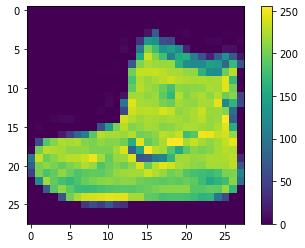

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Scale the color values to a range of 0 to 1
train_images = train_images/255.0
test_images = test_images/255.0

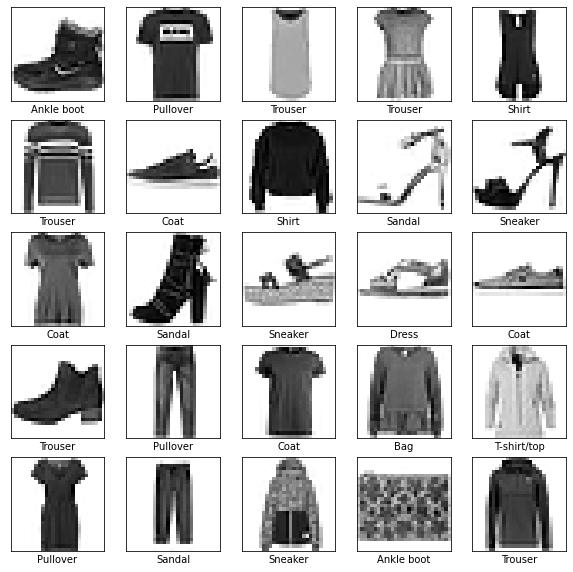

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [25]:
model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy']
             )

In [26]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 4.1582 - accuracy: 0.6841
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7040 - accuracy: 0.7362
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5994 - accuracy: 0.7845
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5503 - accuracy: 0.8106
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5209 - accuracy: 0.8212
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5094 - accuracy: 0.8238
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4987 - accuracy: 0.8288
Epoch 8/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4892 - accuracy: 0.8312
Epoch 9/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4804 - accuracy: 0.8338
Epoch 10/10
60

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest Accuracy:', test_acc)

10000/10000 - 0s - loss: 0.5578 - accuracy: 0.8243

Test Accuracy: 0.8243


In [28]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [30]:
predictions = probability_model.predict(test_images)

In [31]:
predictions[0]

array([4.7947079e-37, 1.0526637e-21, 0.0000000e+00, 1.4934609e-23,
       0.0000000e+00, 1.7822202e-04, 0.0000000e+00, 2.8611135e-03,
       2.2857124e-18, 9.9696058e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

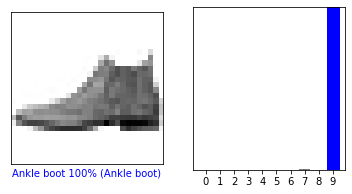

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

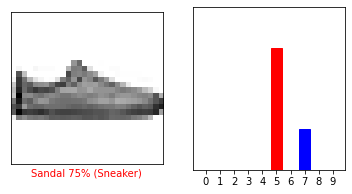

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()